# Project 2: Investigating a Dateset

Xiaodong TAN

# 1 Introduction

In this project, I conducted analysis on the titanic dataset.

First, I am interested to know the structure of the dataset. I found out there are 12 variables in the dataset.

In [2]:
#import data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

titanic = pd.read_csv(r'~/Documents/NanoDegree-DataAnalyst/P2 Investigate a Dataset/Data/titanic-data.csv')
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I noticed that survival is coded as an integer while it is more appropriate to be "object" (1 = survived/0 = not survived).

I also noticed that Pclass is also integer while it is more appropriate to be "category" (class 1/2/3)

I changed the types of the variables concerned accordingly.

In [3]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Survived'] = titanic['Survived'].astype('object')
titanic.dtypes

PassengerId       int64
Survived         object
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

# 2 Questions for the dataset

The key question I proposed for the dataset is what factors made people more likely to survived.

After reviewing the variables in the dataset, I formed some intuitive thoughts.

1) Factors such as passenger class (a proxy to social economic class), sex and age are related to the passengers' personal background. They are all likely to be related to the survival rate.

2) Factors such as number of siblings/spouses/parents/children abroad are situational. They are all likely to be related to the survival rate.

3) Other factors such as passenger fare and port of embarkation are possible linked to the survival rate, as these factors might be related to the passengers' social-economic background. 

4) Other factors, such as ticket number and carbin (if it is not linked to Passenger class), are less likely to have a meaningful relationship with survival rate.


In this project, I decided to focus on the passengers' personal background and explore if these personal factors (age, gender and passenger class/social economic class) are related to their possibiities to survive.

# 2.1 What are the characteristics of the passengers regarding their age, gender, class and survival rate?

I obtained the descriptive statistics of each variable concerned.

I found out that there are 891 samples in the dataset.

1) 549 (over 60%) of them did not survive.

2) There were more males than females.

3) More than half of them were in Class 3.

4) The age information is not available for all the passengers. Based on the available information, the youngest passenger was only a few months; the oldest  was 80-year-old.

In [4]:
survival = titanic['Survived']
sex = titanic['Sex']
passenger_class = titanic['Pclass']
age = titanic['Age']

print survival.describe()
print ""
print sex.describe()
print ""
print passenger_class.describe()
print ""
print age.describe()

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64


/home/dong/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


For the missing values of age, I have choices such as 1) excluding the sample with missing values 2) replacing the missing values with mean, median or mode; 3) multiple imputation, which can reduce the noised introduced by imputation; and 3) develping a model to calculate the missing value.

In this project, as the dataset is already small, I prefer not to eliminate the missing values. Instead, I replaced the missing values with the median age, as I do not want to not change the median of the dataset.

In [45]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)
print titanic['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


I also plotted the three factors that I am going to explore.

I found out that regarding the average age of the passengers:
    
1) males > females

2) Class 1 > Class 2 > Class 3

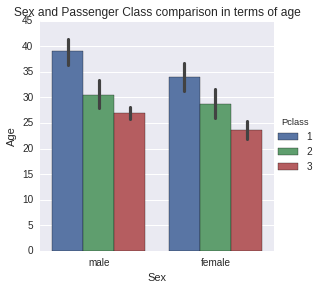

In [46]:
sns.factorplot(x="Sex", y="Age", hue="Pclass", data=titanic, kind = "bar")
sns.plt.title('Sex and Passenger Class comparison in terms of age')

## 2.2 Is there any association between gender and survival?

First, I counted the number of survived males and females, as well as non-survived males and females.

I found out that among the survived individuals, there were more females than males. Among the non-survived, there were more males than females. 

Similary, among the females, there were more suvivors than non-survivors. Among the males, there were more non-survivors than survivors.

In conclusion, there seems to be an association between gender and survival, that females are more likely to survive.

In [36]:
titanic.groupby('Survived')['Sex'].value_counts(sort=False)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

I plotted the data and similar characteristics were found.

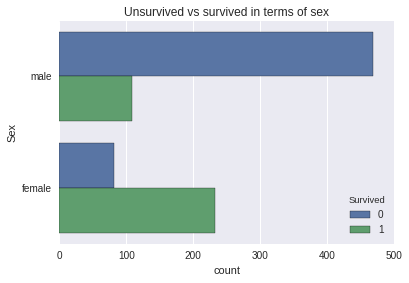

In [47]:
sns.countplot(y="Sex", hue="Survived", data=titanic)
sns.plt.title('Unsurvived vs survived in terms of sex')

Next, I would like to know if the association between gender and survival is significant. As both age and gender are nominal variables, chi squares test of independence was used. The null hypothesis is that gender and survival rate are independant.

After conducting the test, I found out that as p value < 0.01 < 0.05, the null hypothesis was rejected at the 95% confidence level. That is, there is significant association between gender and survival rate.

In [38]:
from scipy.stats import chi2_contingency
obs = np.array([[81,468], [233, 109]])
chi = chi2_contingency(obs)
print "chi-square-statistic = ", round(chi[0], 4)
print "p value = ", chi[1]

chi-square-statistic =  260.717
p value =  1.19735706278e-58


## 2.3 Is there any age difference between the people who survived and who did not?

I calculated the average age of survivors and non-survivors.

I found out that on average, the survived passengers are 2-year-old younger than the unsurvived passengers.

In [39]:
titanic.groupby('Survived')['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Boxplot shows similar features of the data. The minimum, median and 25%/75% percentile values of survived individuals are all lower than those of the nonsurvived individuals.

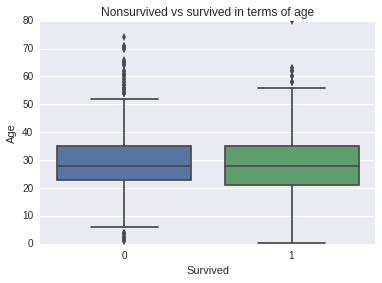

In [40]:
sns.boxplot(x = "Survived", y = "Age", data = titanic)
sns.plt.title('Nonsurvived vs survived in terms of age')

I would like to know if there is significant difference between the average age of survivors and non-survivors. The null hypothesis is there is no significant difference. The alternative hypotheis is there is significant difference.

I used two-detail indepentant t-test as 1) there are only two groups to compare; 2) the samples are indepentant; and 3) I did not expect which groups has an older average age in the null hypothesis.

As the p-value for the test is 0.0527 > 0.05, the null hypothesis is rejected at the 95% confidence level.As a result, there are no significant age difference between the survived and unsurvived.

In [41]:
import scipy.stats as stats

survival_age = titanic.loc[titanic['Survived'] == 1]['Age']
non_survival_age = titanic.loc[titanic['Survived'] == 0]['Age']

# print survival_age
# print non_survival_age

t_test =  stats.ttest_ind(survival_age, non_survival_age, nan_policy='omit')

print "t statistics = ", round(t_test[0],5)
print "p-value = ", t_test[1]

t statistics =  -1.93947
p-value =  0.0527606884759


## 2.4 From which class are passengers more likely to survive?

I calculated the number of survivors/nonsurvivors of passengers in different classes.

I found out that for passengers from Class 1, there were more survivors than non-survivors. For passengers from class 2, there were a little fewer survivors than nonsurvivors. For passengers from class 3, there were far more non-survivors than survivors.

As a result, there seems to be an association between passenger class and survival rate. Passengers from Class 1 more likely to survive than passengers from Class 2 or 3.

In [42]:
titanic.groupby('Pclass')['Survived'].value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

I plotted the data and similar characteristics were found.

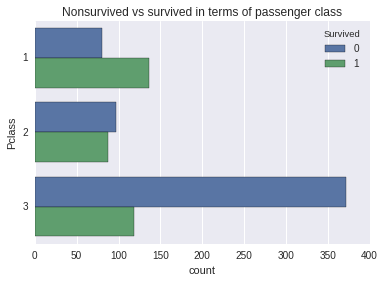

In [43]:
sns.countplot(y="Pclass", hue="Survived", data=titanic)
sns.plt.title('Nonsurvived vs survived in terms of passenger class')

I would like to test if the association between passenger class and survival rate is significant. Similarly, chi-square test of independence was used and the null hypothesis is that passenger class and survival rate are independant.

As p value < 0.01 < 0.05, the null hypothesis was rejected at the 95% and 99% confidence level. That is, there is significant association between passenger class and survival rate.

In [14]:
obs = np.array([[136, 87, 119], [80, 97, 372]])
chi = chi2_contingency(obs)
print "chi-square-statistic = ", round(chi[0], 4)
print "p value = ", chi[1]

chi-square-statistic =  102.889
p value =  4.5492517113e-23


# 3 Summary
In summary, 
Females were more likely to survive than males. The gender difference is statistically significant at the 95% and 99% confidence level.

People in higher class carbin (from higher social economic class) are more likely to survive than people in lower class carbin (from lower social economic class). The class difference is statistically significant at the 95% and 99% confidence level.

Survivors were 2-year younger than the non-survivors. However, the age difference is not statistically significant at the 95% confidence level.

There are shortcomings about this project. As the data of titanic's survival was collected over 100 hundred years ago and a lot of things have changed since then, the findings from the dataset are very difficult to generalize to modern disasters.

In this project, I only explored the personal factors. For future studies, it would be interesting to explore situational factors themselves and how personal background and situational factors interact to affect the survival rate. For examples, compared with males, are females more likely to survive with or without family?

References:
http://www.ats.ucla.edu/stat/mult_pkg/whatstat/
http://math.hws.edu/javamath/ryan/ChiSquare.html
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html
http://seaborn.pydata.org/examples/ http://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic/comments